## We will apply EDA to a real-world dataset by completing each task in the project:
<ol>
    <li>Defining EDA with an overview of the whole project.</li>
    <li>Importing libraries and Exploring the dataset.</li>
    <li>Checking missing values and Outliers.</li>
    <li>Creating visual methods to analyze the data.</li>
    <li>Analyzing trends, patterns, and relationships in the Data.</li>
</ol>

<h1>About the dataset</h1>
<ol>
    <li>gender: Gender of the student</li>
    <li>race/ethnicity </li>
    <li>parental level of education: Highest levelof education parent received</li>
    <li>lunch: what type of lunch program the student is enrolled to./li>
    <li>test preparation cource</li>
    <li>math score</li>
    <li>reading score</li>
    <li>writing score</li>
</ol>

In [126]:
#Importing the libraries
import numpy as np #linear algebra
import pandas as pd # daa preprocessing
import matplotlib.pyplot as plt #visualization
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set() # setting the default seaborn style for our plots


In [127]:
#read the dataset
student_df = pd.read_csv("StudentsPerformance.csv")

In [128]:
#print the forst few records of the dataset
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,male,group B,high school,free/reduced,none,30,24,15
2,male,group A,some college,free/reduced,none,28,23,19
3,male,group E,some high school,standard,none,30,26,22
4,female,group B,high school,free/reduced,none,8,24,23


In [129]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<p>The given dataset has 1000 student records where each record has 5 obejct-type and 3 integer-type attributes.</p>

### Checking for missing values and outliers

In [130]:
#checking for missing values.
student_df.isna().apply(pd.value_counts)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
False,1000,1000,1000,1000,1000,1000,1000,1000


<p>The dataset has no missing records</p>

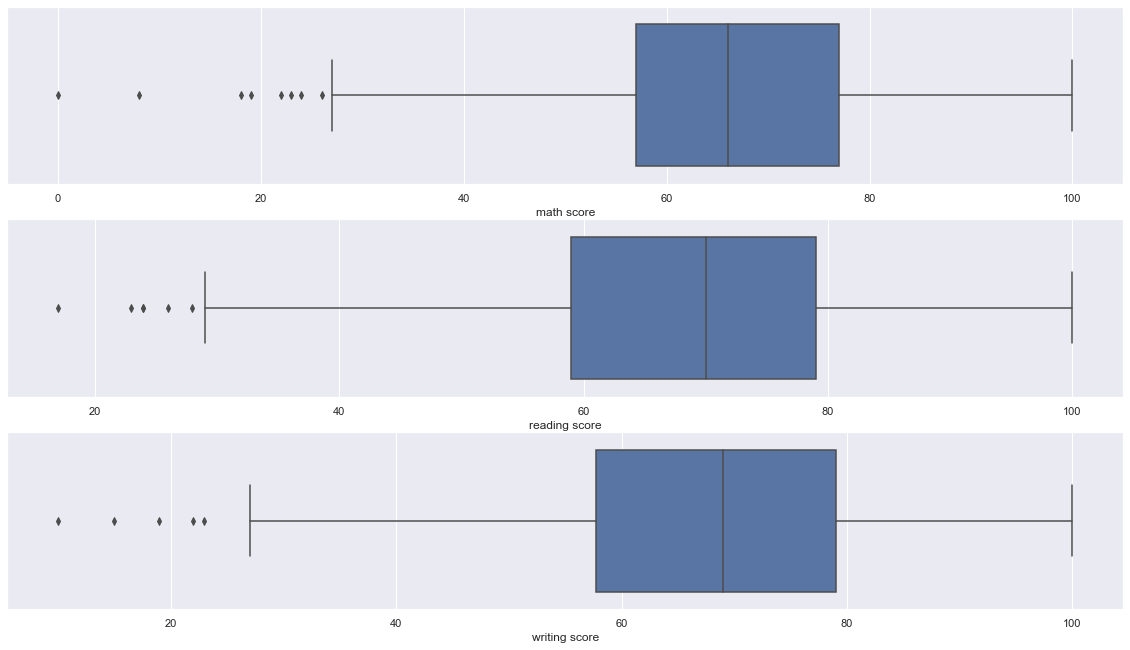

In [131]:
#checking for ouliers.
plt.figure(figsize=(20,15))
plt.subplot(4,1,1)
sns.boxplot(student_df["math score"])
plt.subplot(4,1,2)
sns.boxplot(student_df["reading score"])
plt.subplot(4,1,3)
sns.boxplot(student_df["writing score"])

In [132]:
student_df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


## Visualizing to analyze the data further

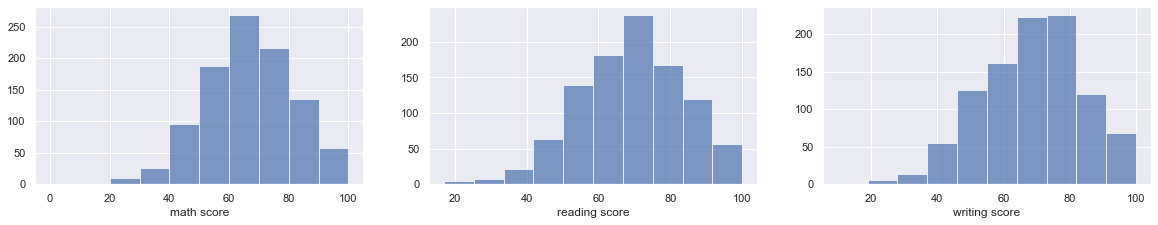

In [133]:
plt.figure(figsize = (20,15))
plt.subplot(4,3,1)
plt.hist(student_df['math score'],alpha = 0.7)
plt.xlabel("math score")
plt.subplot(4,3,2)
plt.hist(student_df['reading score'],alpha = 0.7)
plt.xlabel("reading score")
plt.subplot(4,3,3)
plt.hist(student_df['writing score'],alpha = 0.7)
plt.xlabel("writing score")
plt.show()

In [134]:
# analyzing the skewness of attributes
skewness = pd.DataFrame({'Skewness': [stats.skew(student_df["math score"]),stats.skew(student_df["reading score"]),stats.skew(student_df["writing score"])]}, index = ['math','reading','writitng'])
skewness


,Skewness
math,-0.278517
reading,-0.258716
writitng,-0.289010


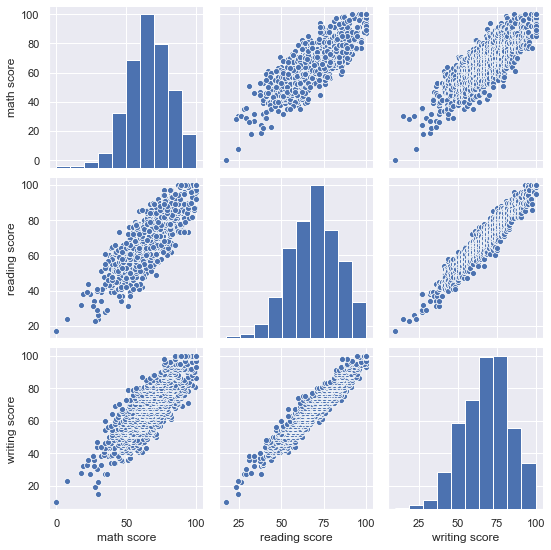

In [135]:
sns.pairplot(
    student_df, 
)

## Analyzing the categorical attributes

In [136]:
student_df["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

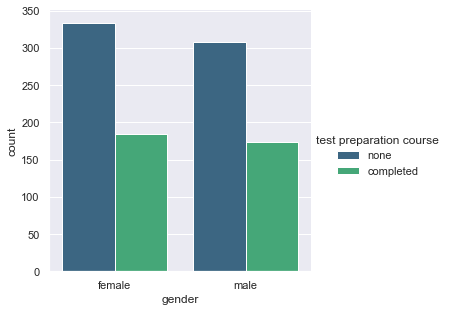

In [137]:
sns.catplot(x='gender',kind='count',data=student_df,height=4.5,palette='viridis',hue = "test preparation course")

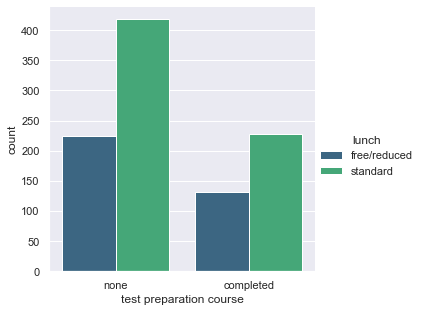

In [138]:
sns.catplot(x='test preparation course',kind='count',data=student_df,height=4.5,palette='viridis',hue = "lunch")

In [139]:
student_df["race/ethnicity"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [140]:
student_df["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [141]:

student_df["test preparation course"].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

(array([ 4., 12., 24., 55., 87., 79., 88., 67., 46., 20.]),
 array([ 27. ,  34.3,  41.6,  48.9,  56.2,  63.5,  70.8,  78.1,  85.4,
         92.7, 100. ]),
 <a list of 10 Patch objects>)

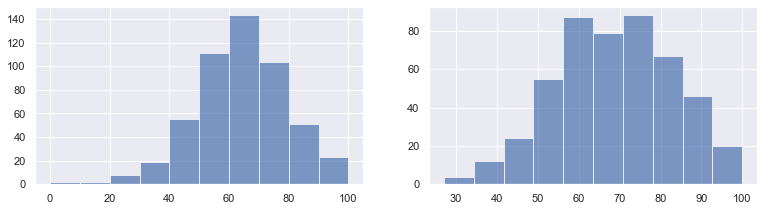

In [142]:
plt.figure(figsize = (20,15))
plt.subplot(4,3,1)
plt.hist(student_df[student_df["gender"] == 'female']['math score'],alpha = 0.7)
plt.subplot(4,3,2)
plt.hist(student_df[student_df["gender"] == 'male']['math score'],alpha = 0.7)


(array([  2.,   3.,   9.,  18.,  50.,  86., 125.,  98.,  80.,  47.]),
 array([ 17. ,  25.3,  33.6,  41.9,  50.2,  58.5,  66.8,  75.1,  83.4,
         91.7, 100. ]),
 <a list of 10 Patch objects>)

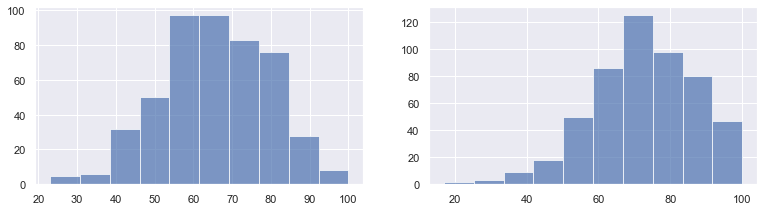

In [143]:
plt.figure(figsize = (20,15))
plt.subplot(4,3,1)
plt.hist(student_df[student_df["gender"] == 'male']['reading score'],alpha = 0.7)
plt.subplot(4,3,2)
plt.hist(student_df[student_df["gender"] == 'female']['reading score'],alpha = 0.7)

(array([  1.,   2.,   7.,  15.,  36.,  68., 108., 141.,  82.,  58.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <a list of 10 Patch objects>)

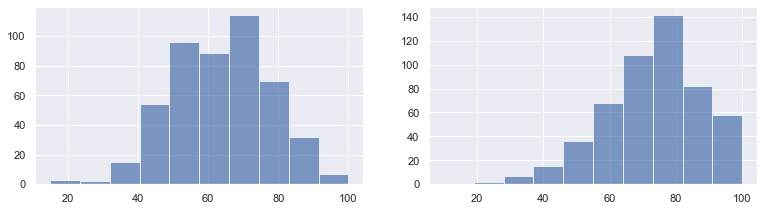

In [144]:
plt.figure(figsize = (20,15))
plt.subplot(4,3,1)
plt.hist(student_df[student_df["gender"] == 'male']['writing score'],alpha = 0.7)
plt.subplot(4,3,2)
plt.hist(student_df[student_df["gender"] == 'female']['writing score'],alpha = 0.7)

In [145]:
student_df['total_score'] = student_df['reading score'] + student_df['writing score'] + student_df['math score']

(array([  1.,   5.,  12.,  40., 124., 178., 262., 210., 122.,  46.]),
 array([ 27. ,  54.3,  81.6, 108.9, 136.2, 163.5, 190.8, 218.1, 245.4,
        272.7, 300. ]),
 <a list of 10 Patch objects>)

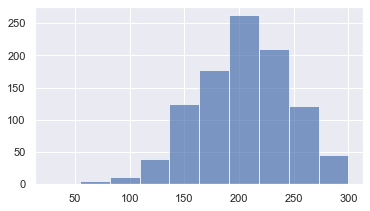

In [146]:
plt.figure(figsize = (20,15))
plt.subplot(4,3,1)
plt.hist(student_df['total_score'],alpha = 0.7)

In [147]:
stats.skew(student_df['total_score'])

-0.29860834478379517

In [148]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group C,some high school,free/reduced,none,0,17,10,27
1,male,group B,high school,free/reduced,none,30,24,15,69
2,male,group A,some college,free/reduced,none,28,23,19,70
3,male,group E,some high school,standard,none,30,26,22,78
4,female,group B,high school,free/reduced,none,8,24,23,55


In [151]:
student_df["gender"] = student_df["gender"].apply(lambda x:1 if x == "female" else 0)
student_df["test preparation course"] = student_df["test preparation course"].apply(lambda x:0 if x == "none" else 1)
student_df["parental level of education"] = student_df["parental level of education"].replace({"some high school":0,"high school":0,"associate's degree":1,"some college":2,"bachelor's degree":3,"master's degree":4})


student_df["lunch"] =student_df["lunch"].apply(lambda x:0 if x == "free/reduced" else 1) 

student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,1,group C,0,0,0,0,17,10,27
1,0,group B,0,0,0,30,24,15,69
2,0,group A,2,0,0,28,23,19,70
3,0,group E,0,1,0,30,26,22,78
4,1,group B,0,0,0,8,24,23,55


In [163]:
student_df = pd.get_dummies(student_df)
student_df.head()

,gender,parental level of education,lunch,test preparation course,reading score,writing score,total_score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,math_score
0,1,0,0,0,17,10,27,0,0,1,0,0,0
1,0,0,0,0,24,15,69,0,1,0,0,0,30
2,0,2,0,0,23,19,70,1,0,0,0,0,28
3,0,0,1,0,26,22,78,0,0,0,0,1,30
4,1,0,0,0,24,23,55,0,1,0,0,0,8


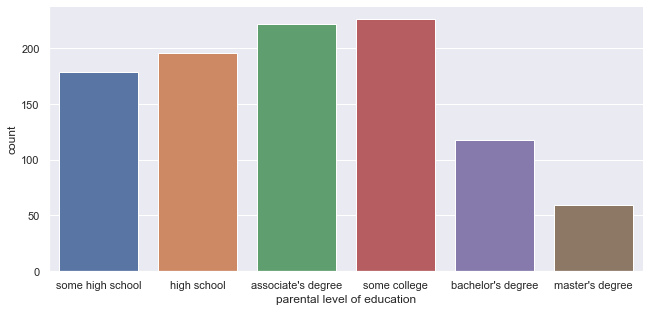

In [28]:
sns.catplot(x = "parental level of education", kind= "count",height=4.5,aspect=2,data = student_df,order=["some high school","high school","associate's degree","some college",
                   "bachelor's degree","master's degree"])

## model-training and evaluation:

In [174]:
X = student_df.loc[:, student_df.columns != 'math score']
Y = student_df["math score"]

In [175]:
X.head()

,gender,parental level of education,lunch,test preparation course,reading score,writing score,total_score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,1,0,0,0,17,10,27,0,0,1,0,0
1,0,0,0,0,24,15,69,0,1,0,0,0
2,0,2,0,0,23,19,70,1,0,0,0,0
3,0,0,1,0,26,22,78,0,0,0,0,1
4,1,0,0,0,24,23,55,0,1,0,0,0


In [186]:
#training-test set split
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [187]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_predictions = lr.predict(X_test)
print('Coefficients: \n', lr.coef_)

Coefficients: 
 [ 3.96827439e-15 -1.14207862e-15 -1.31701437e-14 -1.27776074e-14
 -1.00000000e+00 -1.00000000e+00  1.00000000e+00  8.75557240e-16
 -7.79093824e-16  6.03036346e-16 -5.17890669e-16 -1.37157404e-16]


In [189]:
from sklearn.metrics import r2_score
print("R_square score: ", r2_score(y_test,lr_predictions))

R_square score:  1.0


In [190]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, lr_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lr_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_predictions)))

MAE: 3.109808706843372e-14
MSE: 1.5033374861523837e-27
RMSE: 3.8772896282743486e-14
